In [1]:

from tqdm import tqdm 
import numpy as np
from skimage.transform import resize
from numpy.fft import fftn, fftshift

import matplotlib.pyplot as plt
import matplotlib

In [2]:
plt.style.use('seaborn-white')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20
plt.viridis()

<Figure size 432x288 with 0 Axes>

In [3]:
def histogram1d_engine(raw, npt, radial_range=None):
    """Implementation of rebinning engine using pure numpy histograms
    
    :param radial: radial position 2D array (same shape as raw)   
    :param npt: number of points to integrate over
    :param raw: 2D array with the raw signal
    NaN are always considered as invalid values
    if neither empty nor dummy is provided, empty pixels are left at 0.
    
    Nota: "azimuthal_range" has to be integrated into the 
           mask prior to the call of this function 
    
    :return: Integrate1dtpl named tuple containing: 
            position, average intensity, std on intensity, 
            plus the various histograms on signal, variance, normalization and count.  
                                               
    """
    shape = raw.shape
    y = np.linspace(-shape[0] / 2, shape[0] / 2, shape[0])
    x = np.linspace(-shape[1] / 2, shape[1] / 2, shape[1])
    yy, xx = np.meshgrid(y, x, indexing='ij')
    
    radial = (yy**2 + xx**2)**0.5
    
    raw = np.ascontiguousarray(raw.ravel())
    
    radial = radial.ravel()
    
    if radial_range is None:
        radial_range = (radial.min(), radial.max() * EPS32)
    
    histo_signal, position = numpy.histogram(radial, npt, weights=raw.ravel(), range=radial_range)
    #histo_normalization, position = numpy.histogram(radial, npt, weights=raw[:, 2], range=radial_range)
    #histo_count, position = numpy.histogram(radial, npt, weights=raw[:, 3], range=radial_range)
    positions = (position[1:] + position[:-1]) / 2.0
    return positions, histo_signal

In [4]:
def histogram2d_engine(raw, npt, 
                       radial_range=None,
                       azimuth_range=None
                       ):
    """Implementation of 2D rebinning engine using pure numpy histograms
    
    :param npt: number of points to integrate over in (azimuthal, radial) dimension
    :param raw: 2D array with the raw signal
    """
    
    shape = raw.shape
    y = np.linspace(-shape[0] / 2, shape[0] / 2, shape[0])
    x = np.linspace(-shape[1] / 2, shape[1] / 2, shape[1])
    yy, xx = np.meshgrid(y, x, indexing='ij')
    
    radial = (yy**2 + xx**2)**0.5
    azimuth = np.arctan2(yy, xx)
    
    raw = np.ascontiguousarray(raw.ravel())
    radial = radial.ravel()
    azimuth = azimuth.ravel()
    
    if radial_range is None:
        radial_range = (radial.min(), radial.max() * EPS32)
    if azimuth_range is None:
        azimuth_range = (azimuth.min(), azimuth.max() * EPS32)
    
    histo_count, position_azim, position_rad = np.histogram2d(azimuth, radial, npt, weights=raw, range=[azimuth_range, radial_range])

    bins_azim = (position_azim[1:] + position_azim[:-1]) / 2.0
    bins_rad = (position_rad[1:] + position_rad[:-1]) / 2.0
    return histo_count, bins_azim, bins_rad

In [5]:
data_diffr = np.load('../data/20191008_39_diff.npz')['arr_0']

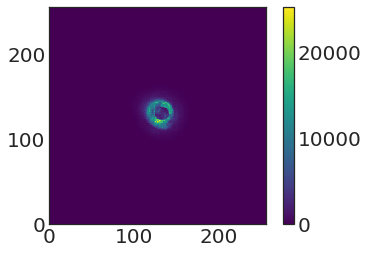

In [21]:
ax = plt.subplot(111)
plt.pcolormesh(data_diffr[0,0])
ax.set_aspect('equal')
plt.colorbar()

In [22]:
data = data_diffr[0,0]

In [23]:
EPS32 = (1.0 + np.finfo(np.float32).eps)

In [24]:
def histogram1d_engine(raw, npt, radial_range=None):
    """Implementation of rebinning engine using pure numpy histograms
    
    :param radial: radial position 2D array (same shape as raw)   
    :param npt: number of points to integrate over
    :param raw: 2D array with the raw signal
    NaN are always considered as invalid values
    if neither empty nor dummy is provided, empty pixels are left at 0.
    
    Nota: "azimuthal_range" has to be integrated into the 
           mask prior to the call of this function 
    
    :return: Integrate1dtpl named tuple containing: 
            position, average intensity, std on intensity, 
            plus the various histograms on signal, variance, normalization and count.  
                                               
    """
    shape = raw.shape
    y = np.linspace(-shape[0] / 2, shape[0] / 2, shape[0])
    x = np.linspace(-shape[1] / 2, shape[1] / 2, shape[1])
    yy, xx = np.meshgrid(y, x, indexing='ij')
    
    radial = (yy**2 + xx**2)**0.5
    
    raw = np.ascontiguousarray(raw.ravel())
    
    radial = radial.ravel()
    
    if radial_range is None:
        radial_range = (radial.min(), radial.max() * EPS32)
    
    histo_signal, position = np.histogram(radial, npt, weights=raw.ravel(), range=radial_range)
    #histo_normalization, position = numpy.histogram(radial, npt, weights=raw[:, 2], range=radial_range)
    #histo_count, position = numpy.histogram(radial, npt, weights=raw[:, 3], range=radial_range)
    positions = (position[1:] + position[:-1]) / 2.0
    return positions, histo_signal
    

Text(0.5, 0, 'f')

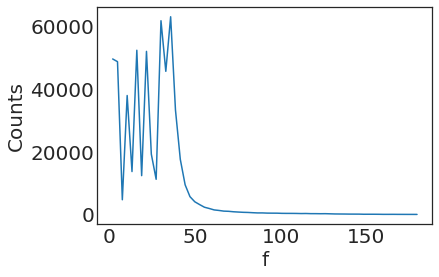

In [25]:
pos, counts = histogram1d_engine(data, 64)

plt.plot(pos, counts)
plt.ylabel('Counts')
plt.xlabel('f')

In [26]:
histo_count_2d, bins_azim, bins_rad = histogram2d_engine(data, (64, 94))

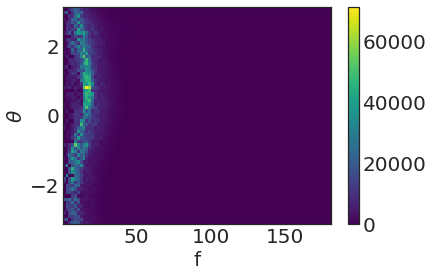

In [36]:
ax = plt.subplot(111)
plt.pcolormesh(bins_rad, bins_azim, histo_count_2d, shading='auto')
#ax.set_aspect('equal')
plt.xlabel('f')
plt.ylabel(r'$\theta$')
plt.colorbar()

<ipython-input-16-353c73a16ffa>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(bins_rad[:64], bins_azim, np.log(histo_count_2d[:,:64] + 1e-4))


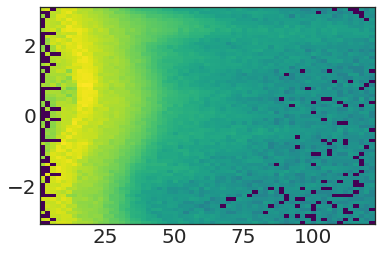

In [16]:
plt.pcolormesh(bins_rad[:64], bins_azim, np.log(histo_count_2d[:,:64] + 1e-4))

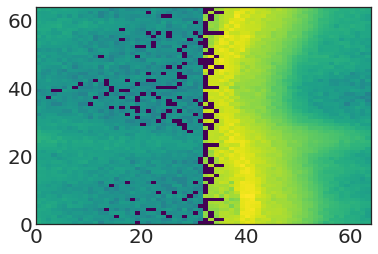

In [23]:
plt.pcolormesh(np.fft.fftshift(np.log(histo_count_2d[:, :64] + 1e-4)))